In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow
import keras
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data_path = '/kaggle/input/skin-cancer-detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train'

file = []
label = []

folds = os.listdir(train_data_path)

for f in folds:
  f_path = os.path.join(train_data_path, f)
  filelist = os.listdir(f_path)
  for fl in filelist:
    file.append(os.path.join(f_path, fl))
    label.append(f)

fseries = pd.Series(file, name='file')
lseries = pd.Series(label, name='label')

train_df = pd.concat([fseries, lseries], axis=1)
train_df.head()

,file,label
0,/kaggle/input/skin-cancer-detection/Skin cance...,pigmented benign keratosis
1,/kaggle/input/skin-cancer-detection/Skin cance...,pigmented benign keratosis
2,/kaggle/input/skin-cancer-detection/Skin cance...,pigmented benign keratosis
3,/kaggle/input/skin-cancer-detection/Skin cance...,pigmented benign keratosis
4,/kaggle/input/skin-cancer-detection/Skin cance...,pigmented benign keratosis


In [3]:
test_data_path = '/kaggle/input/skin-cancer-detection/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

file = []
label = []

folds = os.listdir(test_data_path)

for f in folds:
  f_path = os.path.join(test_data_path, f)
  filelist = os.listdir(f_path)
  for fl in filelist:
    file.append(os.path.join(f_path, fl))
    label.append(f)

fseries = pd.Series(file, name='file')
lseries = pd.Series(label, name='label')

test_df = pd.concat([fseries, lseries], axis=1)
test_df.head()

,file,label
0,/kaggle/input/skin-cancer-detection/Skin cance...,pigmented benign keratosis
1,/kaggle/input/skin-cancer-detection/Skin cance...,pigmented benign keratosis
2,/kaggle/input/skin-cancer-detection/Skin cance...,pigmented benign keratosis
3,/kaggle/input/skin-cancer-detection/Skin cance...,pigmented benign keratosis
4,/kaggle/input/skin-cancer-detection/Skin cance...,pigmented benign keratosis


In [4]:
train_df.shape

(2239, 2)

In [5]:
test_df.shape

(118, 2)

In [6]:
train_df['label'].value_counts()

label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

In [7]:
train_df.isnull().sum()

file     0
label    0
dtype: int64

In [8]:
test_df.isnull().sum()

file     0
label    0
dtype: int64

In [9]:
encode = LabelEncoder()
train_df['label'] = encode.fit_transform(train_df['label'])
test_df['label'] = encode.fit_transform(test_df['label'])

In [10]:
train_df.head()

,file,label
0,/kaggle/input/skin-cancer-detection/Skin cance...,5
1,/kaggle/input/skin-cancer-detection/Skin cance...,5
2,/kaggle/input/skin-cancer-detection/Skin cance...,5
3,/kaggle/input/skin-cancer-detection/Skin cance...,5
4,/kaggle/input/skin-cancer-detection/Skin cance...,5


In [11]:
train_datagen = ImageDataGenerator(
                rescale = (1./255),
                horizontal_flip = True,
                rotation_range = 40,
                fill_mode = 'nearest',
                zoom_range = 0.2)

test_datagen = ImageDataGenerator(
                rescale = (1./255))

In [12]:
train_df['label'] = train_df['label'].astype(str)
test_df['label'] = test_df['label'].astype(str)

In [13]:
train_generator = train_datagen.flow_from_dataframe(
                    dataframe = train_df,
                    x_col = 'file',
                    y_col = 'label',
                    traget_size = (256, 256),
                    batch_size = 32,
                    class_mode = 'categorical')

test_generator = test_datagen.flow_from_dataframe(
                    dataframe = test_df,
                    x_col = 'file',
                    y_col = 'label',
                    traget_size = (256, 256),
                    batch_size = 32,
                    class_mode = 'categorical')

Found 2239 validated image filenames belonging to 9 classes.
Found 118 validated image filenames belonging to 9 classes.


In [14]:
model = Sequential()

model.add(Conv2D(2**5, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(2**6, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(2**7, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(2**8, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(9, activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [15]:
history = model.fit(train_generator, epochs=10, batch_size=32, validation_data=test_generator)

Epoch 1/10


I0000 00:00:1726575886.203393     104 service.cc:145] XLA service 0x7c84b416ac00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726575886.203450     104 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726575886.203455     104 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 2/70 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.1797 - loss: 4.3548  

I0000 00:00:1726575896.211025     104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


70/70 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.1793 - loss: 2.5705 - val_accuracy: 0.1356 - val_loss: 2.1620
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 68s 877ms/step - accuracy: 0.2149 - loss: 2.0673 - val_accuracy: 0.1610 - val_loss: 2.3251
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 65s 839ms/step - accuracy: 0.2176 - loss: 2.0103 - val_accuracy: 0.1525 - val_loss: 2.2149
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 65s 841ms/step - accuracy: 0.2222 - loss: 1.9937 - val_accuracy: 0.2034 - val_loss: 2.2213
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 64s 844ms/step - accuracy: 0.2430 - loss: 1.9850 - val_accuracy: 0.2373 - val_loss: 2.1288
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 65s 845ms/step - accuracy: 0.2327 - loss: 1.9677 - val_accuracy: 0.2288 - val_loss: 2.1116
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 65s 855ms/step - accuracy: 0.3025 - loss: 1.9214 - val_accuracy: 0.2288 - val_loss: 2.1526
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 65s 853ms/step - accuracy: 0.3247 - loss: 1.8402 - val_accuracy: 0.2881 

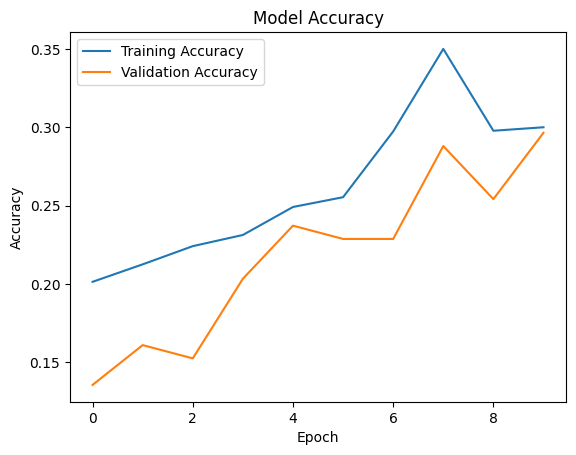

In [21]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

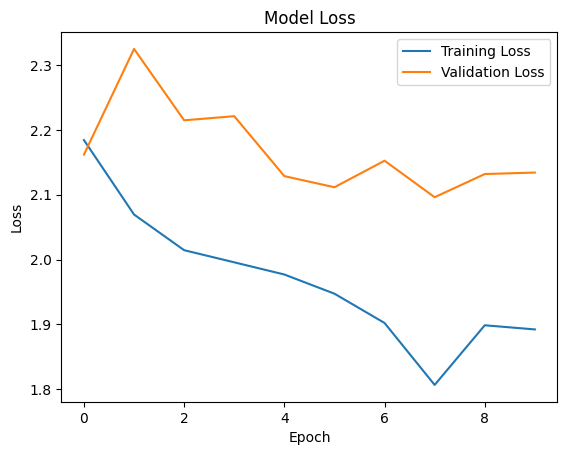

In [23]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()